In [22]:
# load and show dataset
import pandas as pd

file_path = 'RandomForest Datenset 1.csv'
data = pd.read_csv(file_path, sep = "\t").dropna()
print(data['Charge'].value_counts())

data

Charge
2    78454
1    35452
3    26913
4     3294
Name: count, dtype: int64


,Sequence,Charge,Mass,Length,CCS,NumRotatableBonds,NumConformers,NumAtoms,FractionSP3
0,AAAAAAAAAAAATGTEAGPGTAGGSENGSEVAAQPAGLSGPAEVGP...,4,4401.106890,52,2.654046e-35,134.0,0.0,309.0,0.668508
1,AAAAAAAAAK,1,785.439552,10,5.981752e-36,23.0,0.0,55.0,0.696970
2,AAAAAAAAAPAAAATAPTTAATTAATAAQ,2,2367.203020,29,1.208337e-35,64.0,0.0,166.0,0.696970
3,AAAAAAAAAPAAAATAPTTAATTAATAAQ,3,2367.203020,29,2.200959e-35,64.0,0.0,166.0,0.696970
4,AAAAAAAK,1,643.365324,8,6.811654e-36,19.0,0.0,45.0,0.703704
...,...,...,...,...,...,...,...,...,...
144112,YYYNCRTEVSQWEK,3,1924.841400,14,2.846427e-35,58.0,0.0,132.0,0.464286
144113,YYYNCRTEVSQWEKPK,3,2149.989120,16,2.854486e-35,65.0,0.0,148.0,0.505263
144114,YYYQGCASWK,2,1324.554660,10,1.742139e-35,36.0,0.0,90.0,0.383333
144115,YYYVCQYCPAMKTYLNK,3,2264.010450,17,2.726609e-35,64.0,0.0,150.0,0.510000


In [23]:
# preprocessing
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
y_unscaled = data['CCS'].values.reshape(-1,1) * 1e40
y = scaler.fit_transform(y_unscaled)
X_unscaled = data.drop(columns=['CCS', 'Sequence', 'NumConformers'])
X = pd.DataFrame(scaler.fit_transform(X_unscaled), columns= X_unscaled.columns)

X

,Charge,Mass,Length,NumRotatableBonds,NumAtoms,FractionSP3
0,1.000000,0.952978,1.000000,0.854167,0.945017,0.717443
1,0.000000,0.072384,0.066667,0.083333,0.072165,0.766234
2,0.333333,0.457622,0.488889,0.368056,0.453608,0.766234
3,0.666667,0.457622,0.488889,0.368056,0.453608,0.766234
4,0.000000,0.037782,0.022222,0.055556,0.037801,0.777778
...,...,...,...,...,...,...
144108,0.666667,0.349885,0.155556,0.326389,0.336770,0.367347
144109,0.666667,0.404719,0.200000,0.375000,0.391753,0.437594
144110,0.333333,0.203685,0.066667,0.173611,0.192440,0.228571
144111,0.666667,0.432489,0.222222,0.368056,0.398625,0.445714


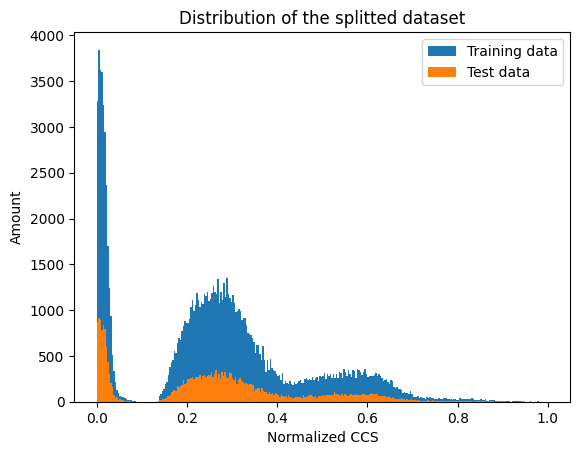

In [24]:
# splitting
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=42)

import matplotlib.pyplot as plt
plt.hist(y_train, label="Training data", bins=300)
plt.hist(y_test, label= "Test data", bins=300)
plt.title("Distribution of the splitted dataset")
plt.ylabel("Amount")
plt.xlabel("Normalized CCS")
plt.legend()
plt.show()

In [31]:
# train first model
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

model = RandomForestRegressor(n_estimators=10, random_state=42)
model.fit(X_train, y_train.ravel())

# output results from cross-validation
# scores = cross_val_score(model, X, y.ravel(), cv=5, scoring='r2')
# print("Cross-validation scores for each fold:", scores)
# print("Mean cross-validation score:", scores.mean())

# evaluate first model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)


print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R² Score: {r2}")

Mean Squared Error: 0.0004085951975546948
Mean Absolute Error: 0.01169322071783082
R² Score: 0.9892193112883364


In [26]:
# hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'n_estimators': list(range(1,25)),
    'max_depth': list(range(1,30)),
    'min_samples_split': list(range(1,10)),
    'max_features': list(range(1,10)),
    'min_samples_leaf': list(range(1,15))
}


random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=10, cv=5, random_state=42)
random_search.fit(X, y.ravel())

print("Beste Parameter:", random_search.best_params_)


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
5 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packag

Beste Parameter: {'n_estimators': 20, 'min_samples_split': 2, 'min_samples_leaf': 14, 'max_features': 6, 'max_depth': 25}


In [32]:
# evaluate optimized model

# Output results from cross-validation
best_model = random_search.best_estimator_
scores = cross_val_score(best_model, X, y.ravel(), cv=5, scoring='r2')
print("Cross-validation scores for each fold:", scores)
print("Mean cross-validation score:", scores.mean())

# Output results from testing
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R² Score: {r2}")

Cross-validation scores for each fold: [0.99102245 0.99059742 0.9904837  0.99032732 0.99009669]
Mean cross-validation score: 0.9905055145353325
Mean Squared Error: 0.0002860039168427788
Mean Absolute Error: 0.009631236957429547
R² Score: 0.9924538535541995


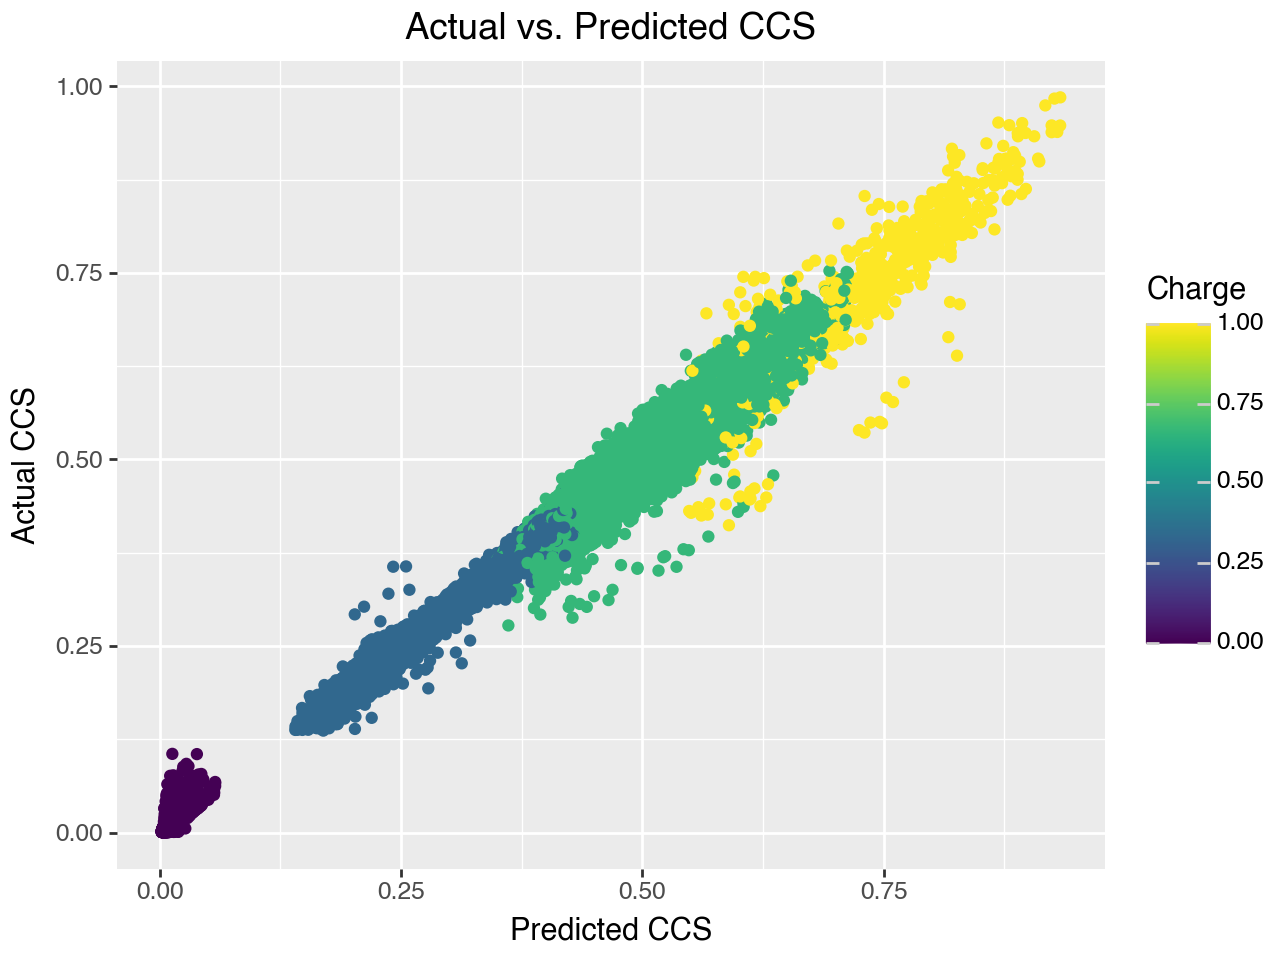

In [28]:
from plotnine import ggplot, aes, geom_point, labs, scale_color_brewer, scale_color_distiller, scale_fill_gradient

df= pd.DataFrame()
df['Charge'] = X_test['Charge']
df['CCS_pred'] = y_pred
df['CCS_actual'] = y_test
(
    ggplot(df, aes(x = "CCS_pred", y = "CCS_actual", color="Charge"))
    +  labs(y = "Actual CCS", x = "Predicted CCS", title="Actual vs. Predicted CCS")

    + geom_point() 
    
    # + scale_color_distiller(palette = "Blues")

)


[learning_curve] Training set sizes: [   10   100  1000 10000 50000]
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.5s
[CV] END .................................................... total time=   2.5s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.7s
[CV] END .................................................... total time=   2.8s
[CV] END .................................................... total time=   0.0s
[CV] END ...............................

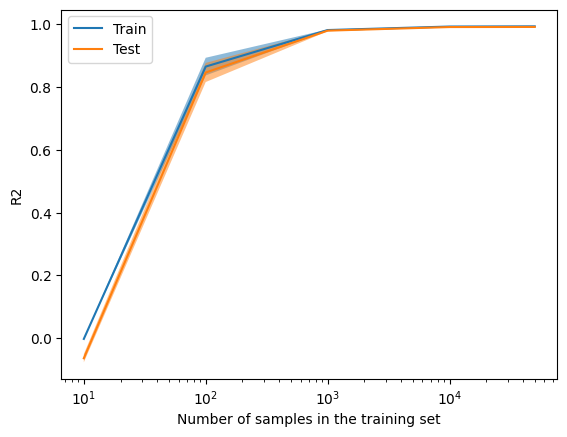

In [29]:
from sklearn.model_selection import LearningCurveDisplay

LearningCurveDisplay.from_estimator(
   estimator=best_model, X=X_train, y=y_train.ravel(), train_sizes=[10,100,1000,10000,50000], cv=5, scoring='r2', verbose=2, random_state=42)

In [ ]:
from sklearn.model_selection import ValidationCurveDisplay

#'neg_mean_squared_error'

ValidationCurveDisplay.from_estimator(
   best_model, X, y.ravel(), param_name="n_estimators", param_range=list(range(1,25)), scoring='r2', verbose=2)

[CV] END .....................................n_estimators=1; total time=   0.7s
[CV] END .....................................n_estimators=2; total time=   0.9s
[CV] END .....................................n_estimators=3; total time=   0.9s
[CV] END .....................................n_estimators=4; total time=   1.2s
[CV] END .....................................n_estimators=5; total time=   1.4s
[CV] END .....................................n_estimators=6; total time=   1.7s
[CV] END .....................................n_estimators=7; total time=   1.9s
[CV] END .....................................n_estimators=8; total time=   2.2s
[CV] END .....................................n_estimators=9; total time=   2.4s
[CV] END ....................................n_estimators=10; total time=   2.9s
[CV] END ....................................n_estimators=11; total time=   4.3s
[CV] END ....................................n_estimators=12; total time=   3.3s
[CV] END ...................

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:  2.2min


[CV] END ....................................n_estimators=17; total time=   5.0s
[CV] END ....................................n_estimators=18; total time=   5.0s
[CV] END ....................................n_estimators=19; total time=   5.3s
[CV] END ....................................n_estimators=20; total time=   6.3s
[CV] END ....................................n_estimators=21; total time=   6.2s
[CV] END ....................................n_estimators=22; total time=   7.2s
[CV] END ....................................n_estimators=23; total time=   6.9s
[CV] END ....................................n_estimators=24; total time=   7.3s
[CV] END .....................................n_estimators=1; total time=   0.3s
[CV] END .....................................n_estimators=2; total time=   0.6s
[CV] END .....................................n_estimators=3; total time=   0.9s
[CV] END .....................................n_estimators=4; total time=   1.4s
[CV] END ...................

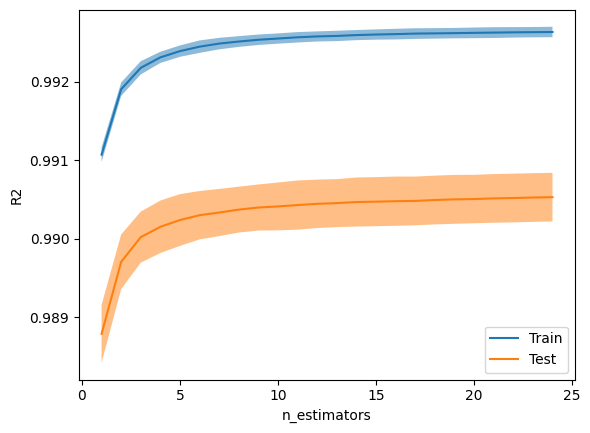

In [ ]:

# # plotting
# from plotnine import ggplot, aes, geom_point, coord_equal
# 
# # Plot
# df = pd.DataFrame({
#     'Predicted': y_pred.ravel(),
#     'Actual': y_test.ravel()
# })
# 
# (
#     ggplot(df, aes("Predicted", "Actual"))
#     + geom_point()
#    
# )


In [ ]:
# max(max(df['CCS_pred']), max(df['CCS_actual']))

In [ ]:
# from plotnine import scale_x_continuous, scale_y_continuous
# 
# for charge in range(1,4):
#     df_temp = df[df['Charge'] == charge]
#     x_limit_max = max(max(df_temp['CCS_pred']), max(df_temp['CCS_actual']))
#     x_limit_min = min(min(df_temp['CCS_pred']), min(df_temp['CCS_actual']))
#    
#     plot = (
#     ggplot(df_temp, aes(x = "CCS_pred", y = "CCS_actual"))
#     + geom_point()
#     + scale_x_continuous(limits=(x_limit_min,x_limit_max))
#     + scale_y_continuous(limits=(x_limit_min,x_limit_max))
# 
#     )
#     
#     plot.show()
    

In [ ]:
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.preprocessing import QuantileTransformer
# from sklearn.preprocessing import MaxAbsScaler
# 
# scaler = MaxAbsScaler()
# y = data['CCS'].values.reshape(-1,1) *1e40
# y_scaled = scaler.fit_transform(y)

# import matplotlib.pyplot as plt
# 
# plt.hist(y)
# plt.title('Unscaled')
# plt.show()
# 
# plt.hist(y_scaled)
# plt.title("Scaled")
# plt.show()
# min_y = min(y)
# max_y = max(y)
# 
# print(min_y, max_y)
# 
# y_scaled = (y-min_y) / ( max_y-min_y )
# 
# plt.hist(y_scaled, bins=500)
# plt.title("Scaled")
# plt.show()
#X = data.drop(columns=['CCS', 'Sequence', 'NumConformers'])

# X = pd.DataFrame(data[['Mass']])
# charge = 4
# X = data[data['Charge'] == charge].drop(columns=['Charge', 'CCS', 'Sequence', 'NumConformers'])
# y = y[data['Charge'] == charge]
# X



# from sklearn.model_selection import GridSearchCV
# 
# # Define the parameter grid
# param_grid = {
#     'n_estimators': [2],  # Number of trees in the forest
#     'max_depth': [None, 10, 20, 30],    # Maximum depth of the tree
#     'min_samples_split': [2, 5, 10],    # Minimum samples required to split an internal node
#     'min_samples_leaf': [1, 2, 4]   ,     # Minimum samples required to be at a leaf node
#     'max_features': [2,3,5]
# }
# 
# # Initialize GridSearchCV
# grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='r2', verbose=2, n_jobs=-1)
# 
# # Fit GridSearchCV
# grid_search.fit(X, y.ravel())
# 
# # Output the best parameters and the best score
# print("Best Parameters:", grid_search.best_params_)
# print("Best Cross-Validation Score:", grid_search.best_score_)
# 
# # Perform cross-validation with the best estimator
# best_model = grid_search.best_estimator_
# scores = cross_val_score(best_model, X, y.ravel(), cv=5, scoring='r2')
# 
# # Output results from cross-validation
# print("Cross-validation scores for each fold:", scores)
# print("Mean cross-validation score:", scores.mean())
# 
# plt.show()


# from sklearn.ensemble import RandomForestRegressor
# from sklearn.model_selection import cross_val_score
# 
# model = RandomForestRegressor(n_estimators=10, random_state=42)
# 
# # Perform 5-fold cross-validation
# scores = cross_val_score(model, X, y.ravel(), cv=5, scoring='r2')
# 
# # Output results
# print("Cross-validation scores for each fold:", scores)
# print("Mean cross-validation score:", scores.mean())